In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import heapq

In [2]:
def generate_maze(rows, cols):
# Ensure odd dimensions
    if rows % 2 == 0: rows += 1
    if cols % 2 == 0: cols += 1

    maze = np.ones((rows, cols), dtype=int)
    start_r = random.randrange(1, rows, 2)
    start_c = random.randrange(1, cols, 2)
    maze[start_r, start_c] = 0

# Frontier walls list: (r1, c1, r2, c2)
    walls = []
    for dr, dc in [(-2,0),(2,0),(0,-2),(0,2)]:
        r2, c2 = start_r + dr, start_c + dc

        if 0 <= r2 < rows and 0 <= c2 < cols:
            walls.append((start_r, start_c, r2, c2))

    while walls:
        r1, c1, r2, c2 = walls.pop(np.random.randint(len(walls)))
        if maze[r2, c2] == 1:
            # Count adjacent passages around (r2,c2)
            neigh_passages = 0
            for dr, dc in [(-2,0),(2,0),(0,-2),(0,2)]:
                rr, cc = r2 + dr, c2 + dc
                if 0 <= rr < rows and 0 <= cc < cols and maze[rr, cc] == 0:
                    neigh_passages = 0  
                    neigh_passages += 1
            if neigh_passages == 1:
            # Carve wall and cell
                mid_r, mid_c = (r1 + r2)//2, (c1 + c2)//2
                maze[mid_r, mid_c] = 0
                maze[r2, c2] = 0
# Add new frontier walls
                for dr, dc in [(-2,0),(2,0),(0,-2),(0,2)]:
                    nr, nc = r2 + dr, c2 + dc
                    if 0 <= nr < rows and 0 <= nc < cols and maze[nr, nc] == 1:
                        walls.append((r2, c2, nr, nc))
    return maze

In [3]:
maze = generate_maze(21, 21)

In [4]:
def place_start_goal(maze):
    rows, cols = maze.shape
    start = (1, 1)
    goal = (rows - 2, cols - 2)

    # Ensure start and goal are not walls
    # maze[start] = 2  # Start
    # maze[goal] = 3   # Goal

    return maze 

maze = place_start_goal(maze)
maze




array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1]
 [1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


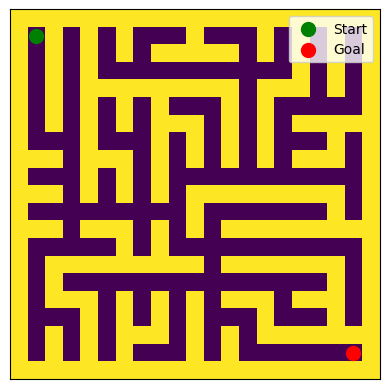

In [5]:
# Visualize the Maze
grid = np.array(maze)
print(grid)
plt.imshow(grid, cmap='viridis')
start = np.argwhere(grid == 2)
goal = np.argwhere(grid == 3)

for y, x in [(1,1)]:
    plt.scatter(x, y, c='g', s=100, marker='o', label='Start')

for y, x in [(19, 19)]:
    plt.scatter(x, y, c='r', s=100, marker='o', label='Goal')

plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

In [6]:
# Find Neighbors
ROWS = grid.shape[0] - 1
COLS = grid.shape[1] - 1

def get_neighbours(r, c):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in directions:
        new_r, new_c = r + dr, c + dc
        if 0 <= new_r <= ROWS and 0 <= new_c <= COLS and grid[new_r][new_c] != 1:  # Exclude walls
            neighbors.append((new_r, new_c))
    return neighbors

print("Neighbors of (19, 19):", get_neighbours(19, 19))

Neighbors of (19, 19): [(19, 18)]


In [7]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [8]:

import matplotlib.animation as animation
import matplotlib.colors as mcolors

#add animation in current function
def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    pq = []
    heapq.heappush(pq, (0 + heuristic(start, goal), 0, start, [start]))  # (f(n), g(n), position, path)
    
    visited = set()
    
    while pq:
        f, g, current, path = heapq.heappop(pq)

        if current == goal:
            print(path)
            return (path, visited)
        
        if current in visited:
            continue
        
        visited.add(current)

        x, y = current
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:  # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                neighbor = (nx, ny)
                if neighbor not in visited:
                    g = g + 1
                    f = g + heuristic(neighbor, goal)
                    heapq.heappush(pq, (f, g, neighbor, path + [neighbor]))

    return None 

In [9]:
start = (1, 1)
goal = (19,19)
path, visited = astar(maze, start, goal)
print(path)
# print("Path found:" if 0

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (12, 9), (13, 9), (13, 10), (13, 11), (14, 11), (15, 11), (16, 11), (17, 11), (17, 12), (17, 13), (18, 13), (19, 13), (19, 14), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19)]
[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (12, 9), (13, 9), (13, 10), (13, 11), (14, 11), (15, 11), (16, 11), (17, 11), (17, 12), (17, 13), (18, 13), (19, 13), (19, 14), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19)]


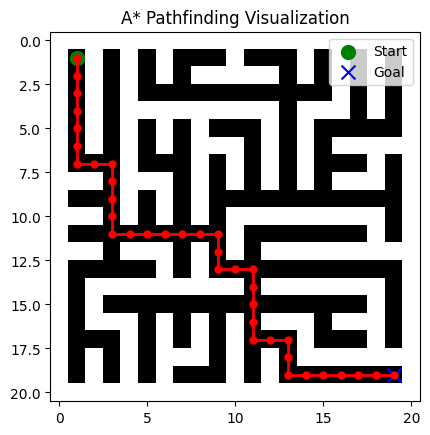

In [10]:
def plot_path(maze, path):          
    plt.imshow(maze, cmap='gray', origin='upper')
    if path:
        x, y = zip(*path)
        plt.plot(y, x, marker='o', color='red', linewidth=2, markersize=5)
    plt.scatter(start[1], start[0], marker='o', color='green', s=100, label='Start')
    plt.scatter(goal[1], goal[0], marker='x', color='blue', s=100, label='Goal')
    plt.legend()
    plt.title('A* Pathfinding Visualization')
    plt.show()
plot_path(maze, path)

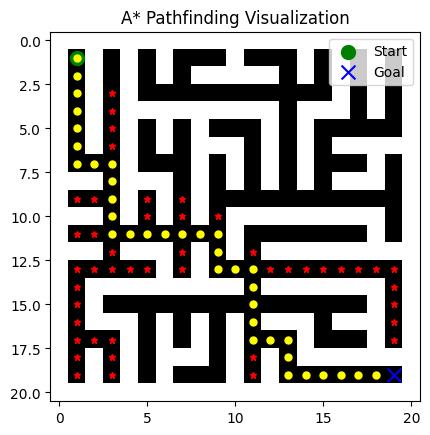

{(5, 1), (17, 3), (17, 12), (11, 5), (19, 18), (7, 1), (18, 1), (13, 17), (5, 3), (9, 1), (19, 11), (11, 7), (13, 1), (13, 10), (7, 3), (18, 3), (13, 19), (9, 3), (11, 9), (13, 3), (13, 12), (3, 1), (14, 1), (9, 5), (11, 2), (14, 19), (13, 5), (16, 1), (13, 14), (15, 11), (16, 19), (3, 3), (17, 2), (17, 11), (9, 7), (11, 4), (13, 7), (6, 1), (13, 16), (19, 13), (13, 9), (7, 2), (13, 18), (18, 11), (9, 2), (10, 3), (13, 2), (19, 15), (13, 11), (12, 3), (10, 5), (13, 4), (2, 1), (19, 17), (4, 1), (14, 11), (19, 1), (17, 13), (10, 7), (11, 6), (6, 3), (12, 7), (4, 3), (8, 3), (19, 3), (10, 9), (11, 8), (18, 13), (12, 9), (11, 1), (19, 14), (15, 1), (13, 13), (15, 19), (12, 11), (17, 1), (1, 1), (11, 3), (17, 19), (19, 16), (13, 15), (16, 11)}


In [11]:
def plot_path(maze, visited, path):          
    plt.imshow(maze, cmap='gray', origin='upper')
    for x, y in visited:
        plt.plot(y, x, marker='*', color='red', linewidth=2, markersize=5)
        if (x, y) in path:
            plt.plot(y, x, marker='o', color='yellow', linewidth=2, markersize=5)

    plt.scatter(start[1], start[0], marker='o', color='green', s=100, label='Start')
    plt.scatter(goal[1], goal[0], marker='x', color='blue', s=100, label='Goal')
    plt.legend()
    plt.title('A* Pathfinding Visualization')
    plt.show()
plot_path(maze, visited, path)
print(visited)